<a href="https://colab.research.google.com/github/MmV0/Hyper-Big-Bank/blob/main/Hyper_Big_Bank_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load datasets
df = pd.read_csv('DataFinal.csv')
df = df.rename(columns = {"PotentialBuyerHyperCrypto" : "target"})
df.head(5)

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,target
0,0.275522,1,2.77,D,0.99,6.0,89,3,46,7,468,10,0
1,0.365429,1,4.75,D,0.64,3.0,81,2,27,7,4,1,1
2,0.284353,0,6.95,B,0.34,7.0,93,1,29,0,933,7,0
3,0.356867,1,2.87,D,0.80,5.0,39,3,61,7,254,2,0
4,0.462896,0,2.81,A,0.82,4.0,5,3,75,4,805,7,0


##**Data Preprocessing**

####**Dealing with Missing Values**


In [3]:
# Distribution of Feature 5
df.groupby('Feat5', dropna=False).size()

Feat5
0.0      70
1.0     149
2.0     137
3.0     136
4.0     140
5.0     155
6.0     152
7.0     143
8.0     154
9.0     130
10.0     77
NaN      57
dtype: int64

In [4]:
df[df['Feat5'].isna()].groupby('target').size()

target
0    43
1    14
dtype: int64

In [5]:
# Drop missing values
df = df.dropna()
# Plot new distribution
df.groupby('Feat5', dropna=False).size()

Feat5
0.0      70
1.0     149
2.0     137
3.0     136
4.0     140
5.0     155
6.0     152
7.0     143
8.0     154
9.0     130
10.0     77
dtype: int64

####**Dealing with outliers**


In [6]:
df_s = df.drop(['Feat3'], axis=1)

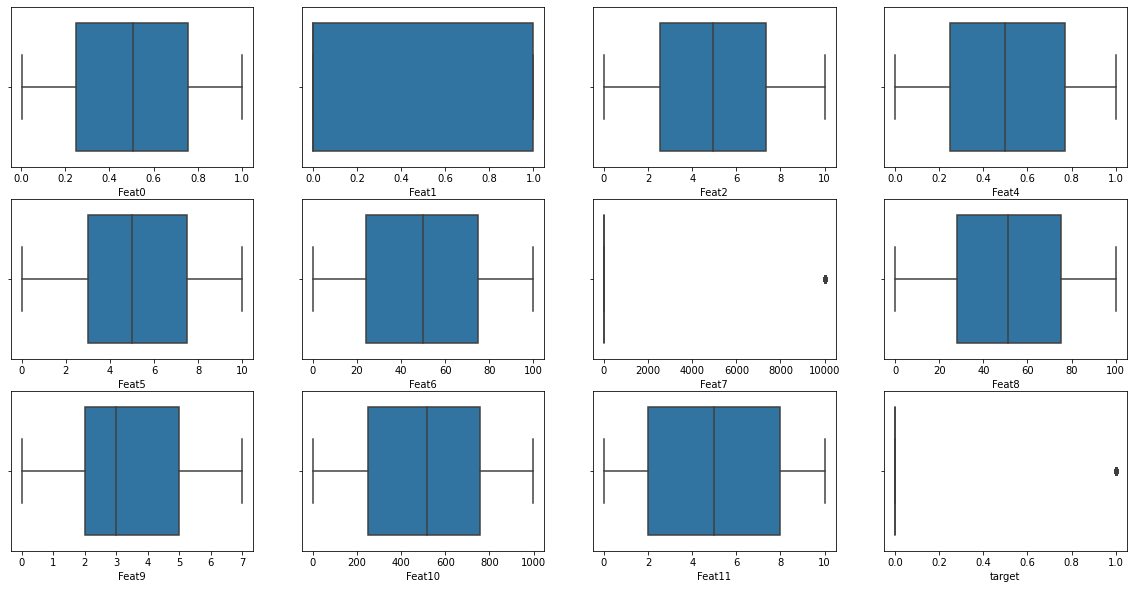

In [7]:
# Remove some warnings
import warnings
warnings.filterwarnings('ignore')

# Check outliners
fig, ax = plt.subplots(3, 4, figsize=(20, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(df_s[df_s.columns[i*4+j]], ax=ax[i][j])

In [8]:
# Outlier Detection and Treatment using 1.5 IQR rule
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [9]:
# Using the above function, lets get the lowerbound and upperbound values
lowerbound,upperbound = outlier_treatment(df.Feat7)
# Lets check which rows is considered as an outlier in acordance with Feat7
df[(df.Feat7 < lowerbound) | (df.Feat7 > upperbound)]

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,target
83,0.041872,1,0.95,D,0.14,9.0,37,9999,60,3,180,9,0
90,0.922217,1,1.85,A,0.65,5.0,50,9999,36,1,905,3,0
94,0.936203,1,4.88,A,0.54,4.0,80,9999,79,4,801,9,0
129,0.040768,0,2.39,B,0.35,2.0,13,9999,84,5,418,0,0
229,0.180866,1,8.64,B,0.97,1.0,0,9999,74,6,764,4,0
304,0.904927,1,0.63,A,0.81,3.0,23,9999,98,3,66,8,0
330,0.776253,1,4.68,A,0.16,9.0,70,9999,89,7,192,6,0
383,0.270473,0,1.30,B,0.69,4.0,66,9999,66,2,494,4,0
385,0.216949,1,8.82,D,0.96,2.0,88,9999,28,3,927,4,0
413,0.790412,1,8.79,D,0.67,7.0,18,9999,88,2,200,10,0


In [10]:
# Now lets remove the outliers from the dataset
df.drop(df[(df.Feat7 > upperbound) | (df.Feat7 < lowerbound) ].index , inplace=True)

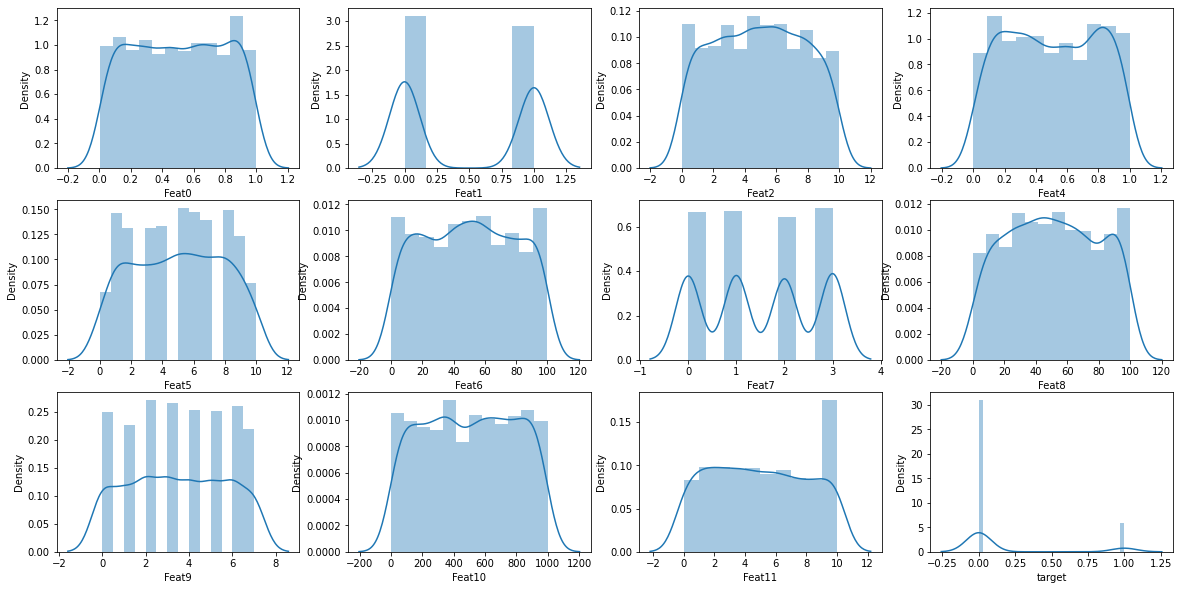

In [11]:
# Remove some warnings
import warnings
warnings.filterwarnings('ignore')

df_s = df.drop(['Feat3'], axis=1)

# Features density distribution 
fig, ax = plt.subplots(3, 4, figsize=(20, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df_s[df_s.columns[i*4+j]], ax=ax[i][j])

####**Data Splitting**

In [12]:
# Divide the dataset into Dependent & Independent variable
X = df.drop(['target'], axis=1)
y = df.target

In [13]:
# Create a validation dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Resampling Technique - oversampling**

In [14]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
print('Original dataset shape', Counter(y_train))
X_train, y_train = ros.fit_resample(X_train, y_train)
print('Resample dataset shape', Counter(y_train))

Original dataset shape Counter({0: 948, 1: 175})
Resample dataset shape Counter({0: 948, 1: 948})


####**Encoding Non-Numerical Input Data**

In [15]:
# One-hot encoding
X_train = pd.get_dummies(X_train, columns = ['Feat3'])
X_test = pd.get_dummies(X_test, columns = ['Feat3'])
X_train.head()

,Feat0,Feat1,Feat2,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,Feat3_A,Feat3_B,Feat3_D
0,0.467667,1,6.47,0.26,1.0,12,0,61,1,914,3,1,0,0
1,0.503949,0,0.15,0.91,7.0,50,3,88,1,543,5,0,0,1
2,0.840302,1,0.86,0.36,3.0,31,1,30,4,732,1,0,1,0
3,0.228388,0,6.27,0.95,9.0,6,1,18,4,814,8,1,0,0
4,0.385112,1,5.69,0.51,8.0,88,1,32,4,36,9,1,0,0


In [16]:
features = X_train.columns.values.tolist()

####**Feature Scaling**

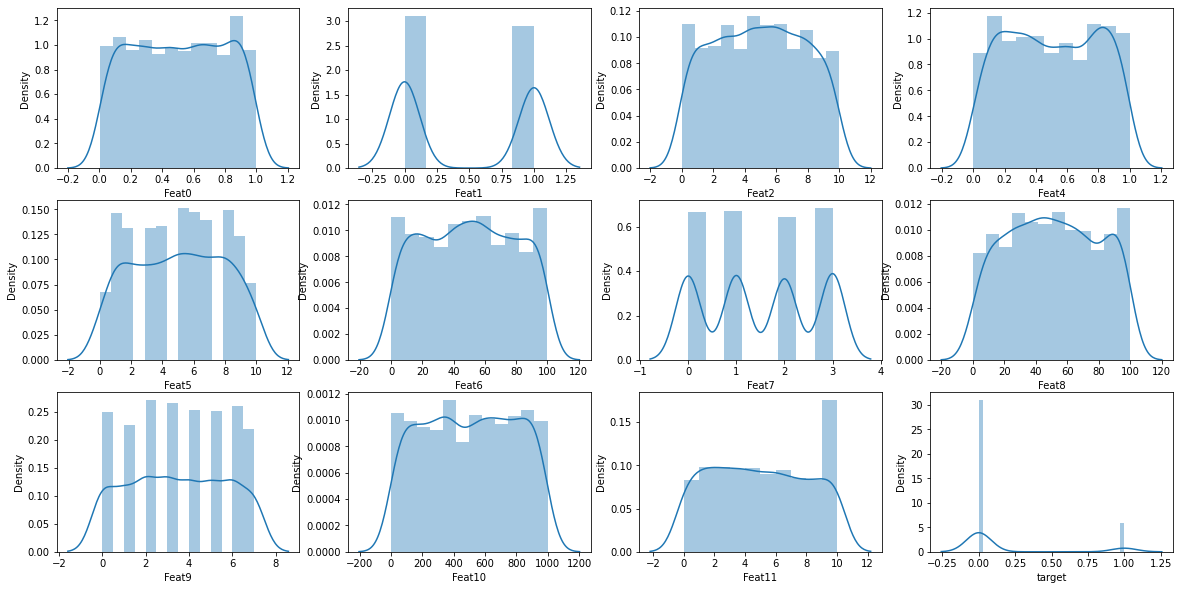

In [17]:
# Remove some warnings
import warnings
warnings.filterwarnings('ignore')

# Copy the df with no tahet
df_s = df.drop(['Feat3'], axis=1)

# Features density distribution 
fig, ax = plt.subplots(3, 4, figsize=(20, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df_s[df_s.columns[i*4+j]], ax=ax[i][j])

In [18]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##**ML Models**

####**Model Selection**

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.802233 (0.022453)
DTC: 0.988390 (0.009389)
RFC: 0.982069 (0.013160)
SVM: 0.821223 (0.015848)


We can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 100% accuracy, and some pushing down into the high 80% accuracies.

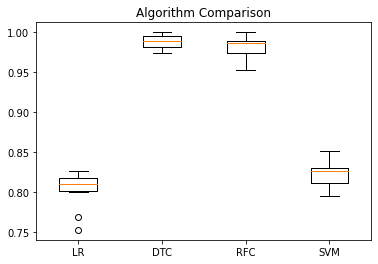

In [20]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

####**1. Logisti Regression**

In [21]:
# Create the classifier and fit it to our training data
logreg=LogisticRegression(solver='lbfgs', multi_class='auto')
logreg.fit(X_train, y_train)  

# Predict classes
y_train_pred=logreg.predict(X_train)
y_test_pred=logreg.predict(X_test)

Training Error Score 0.19198312236286919
Test Error Score 0.23131672597864772


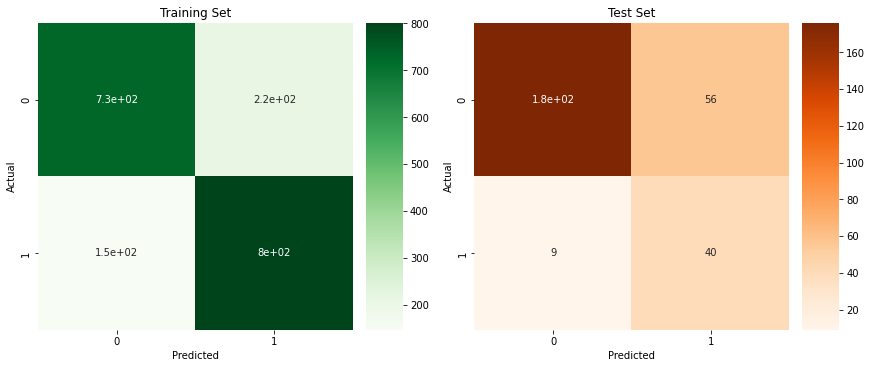

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Make a confusion matrix to evaluate the results
cm1 = confusion_matrix(y_train, y_train_pred)
cm2 = confusion_matrix(y_test, y_test_pred)

labels=['0', '1']

df_cm1=pd.DataFrame(cm1, columns=labels, index=labels)
df_cm1.index.name='Actual'
df_cm1.columns.name='Predicted'

df_cm2=pd.DataFrame(cm2, columns=labels, index=labels)
df_cm2.index.name='Actual'
df_cm2.columns.name='Predicted'

fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize = (12,5))
snFig=sns.heatmap(df_cm1, ax=ax1, cmap="Greens", annot=True)
snFig=sns.heatmap(df_cm2, ax=ax2, cmap="Oranges", annot=True)
ax1.title.set_text('Training Set')
ax2.title.set_text('Test Set')

# Calculate the accuracy
print('Training Error Score '+str(1.0-metrics.accuracy_score(y_train,y_train_pred)))
print('Test Error Score '+str(1.0-metrics.accuracy_score(y_test,y_test_pred)))

####**2. Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics


# Create the classifier and fit it to our training data
model_dt = DecisionTreeClassifier(random_state=22)
model_dt.fit(X_train, y_train)

# Predict classes
y_trainPredict= model_dt.predict(X_train)
y_testPredict= model_dt.predict(X_test)

Training Error Score 0.0
Test Error Score 0.03558718861209964
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       232
           1       0.91      0.88      0.90        49

    accuracy                           0.96       281
   macro avg       0.94      0.93      0.94       281
weighted avg       0.96      0.96      0.96       281



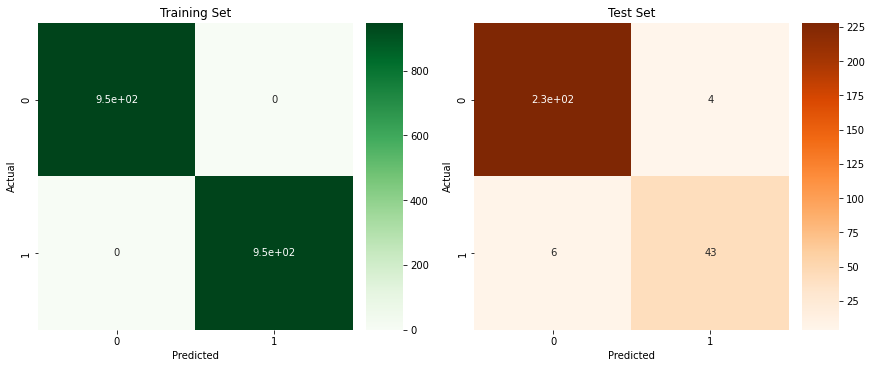

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Make a confusion matrix to evaluate the results
cm1 = confusion_matrix(y_train, y_trainPredict)
cm2 = confusion_matrix(y_test, y_testPredict)

labels=['0', '1']

df_cm1=pd.DataFrame(cm1, columns=labels, index=labels)
df_cm1.index.name='Actual'
df_cm1.columns.name='Predicted'

df_cm2=pd.DataFrame(cm2, columns=labels, index=labels)
df_cm2.index.name='Actual'
df_cm2.columns.name='Predicted'

fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize = (12,5))
snFig=sns.heatmap(df_cm1, ax=ax1, cmap="Greens", annot=True)
snFig=sns.heatmap(df_cm2, ax=ax2, cmap="Oranges", annot=True)
ax1.title.set_text('Training Set')
ax2.title.set_text('Test Set')

# Calculate the accuracy
print('Training Error Score '+str(1.0-metrics.accuracy_score(y_train,y_trainPredict)))
print('Test Error Score '+str(1.0-metrics.accuracy_score(y_test,y_testPredict)))
print(classification_report(y_test,y_testPredict))

#### **3. Random forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create the classifier and fit it to our training data
model_rf = RandomForestClassifier(random_state=7, n_estimators=100)
model_rf.fit(X_train, y_train)

# Predict classes
y_trainPredict= model_rf.predict(X_train)
y_testPredict= model_rf.predict(X_test)

Training Error Score 0.0
Test Error Score 0.0462633451957295


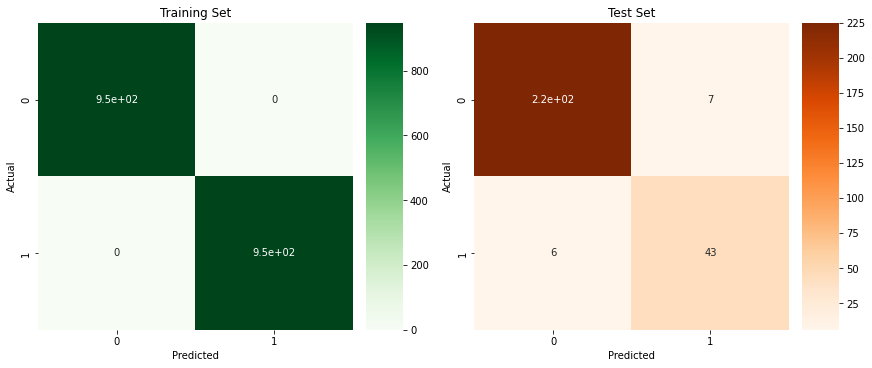

In [26]:
# Make a confusion matrix to evaluate the results
cm1=confusion_matrix(y_train, y_trainPredict)
cm2=confusion_matrix(y_test, y_testPredict)

labels=['0','1']

df_cm1=pd.DataFrame(cm1, columns=labels, index=labels)
df_cm1.index.name='Actual'
df_cm1.columns.name='Predicted'

df_cm2=pd.DataFrame(cm2, columns=labels, index=labels)
df_cm2.index.name='Actual'
df_cm2.columns.name='Predicted'

fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize = (12,5))
snFig=sns.heatmap(df_cm1, ax=ax1, cmap="Greens", annot=True)
snFig=sns.heatmap(df_cm2, ax=ax2, cmap="Oranges", annot=True)
ax1.title.set_text('Training Set')
ax2.title.set_text('Test Set')

# Calculate the accuracy
print('Training Error Score '+str(1.0-metrics.accuracy_score(y_train,y_trainPredict)))
print('Test Error Score '+str(1.0-metrics.accuracy_score(y_test,y_testPredict)))

#### **Feature Selection**

>2 0.947 (0.013)
>3 0.959 (0.014)
>4 0.971 (0.013)
>5 0.969 (0.010)
>6 0.974 (0.008)
>7 0.983 (0.010)
>8 0.990 (0.009)
>9 0.990 (0.008)
>10 0.990 (0.008)
>11 0.990 (0.008)


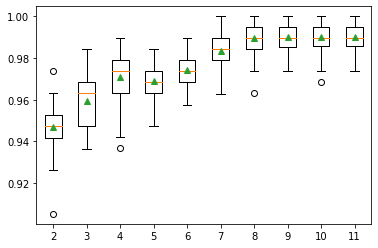

In [27]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 12):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [28]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)
# fit RFE
rfe.fit(X_train, y_train)
# summarize all features
for i in range(X_train.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 9.000
Column: 1, Selected False, Rank: 13.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 6.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected False, Rank: 8.000
Column: 6, Selected False, Rank: 12.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected False, Rank: 7.000
Column: 9, Selected False, Rank: 4.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 11.000
Column: 12, Selected False, Rank: 5.000
Column: 13, Selected False, Rank: 10.000
